In [1]:
from util import *
from sklearn.model_selection import KFold

### 0. Load data for RF and SVM

train.csv and test.csv is formed manually from features_3_sec.csv such that they contain good mix of all types of genre. This dataset is used everywhere everywhere except in 1.2. In 1.2, we used features_30_sec.csv for testing out best hyper parameters using randomized cross validation.

In [2]:
X_train, y_train = load_preprocess_xy('data/train.csv',0, True, False, False) #scale X, no encode y, no dummify y
X_test, y_test = load_preprocess_xy('data/test.csv',0, True, False, False)

# 1. Random Forest

In [3]:
from random_forest import *

### 1.1. Use hyper parameters obtained with randomized search cross validation with some changes

Hypperparameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


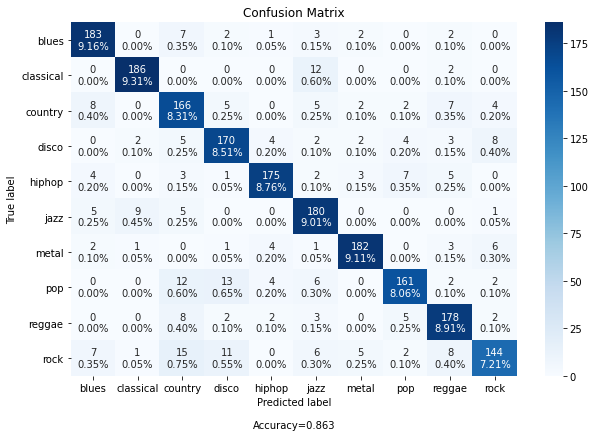

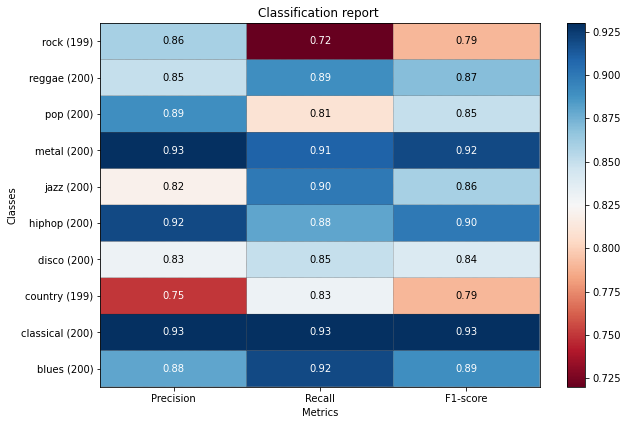

In [4]:
fit_predict_print(rf_fit_predict, X_train, y_train, X_test, y_test)

Note that all confusion matrix show result of predicting genre of tracks in test data. So its test accuracy, not train accuracy. 

### 1.2. Search for best hyperparameters by doing randomized cross validation (on 30 sec data set)

Load 30s data.

In [5]:
X30_train, X30_test, y30_train, y30_test = load_preprocess_xy('data/features_30_sec.csv',20, True, False, False) 

Run randomized search CV

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 27.3min finished


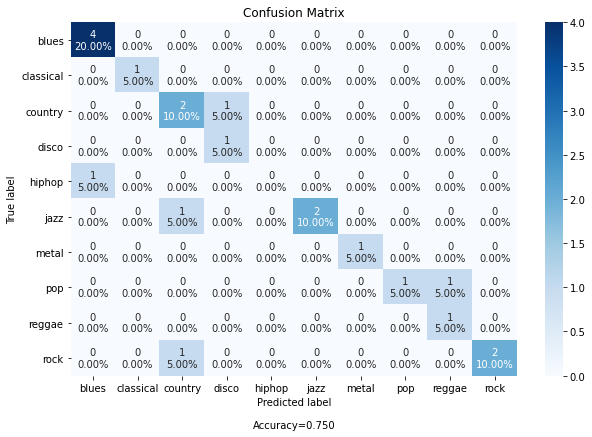

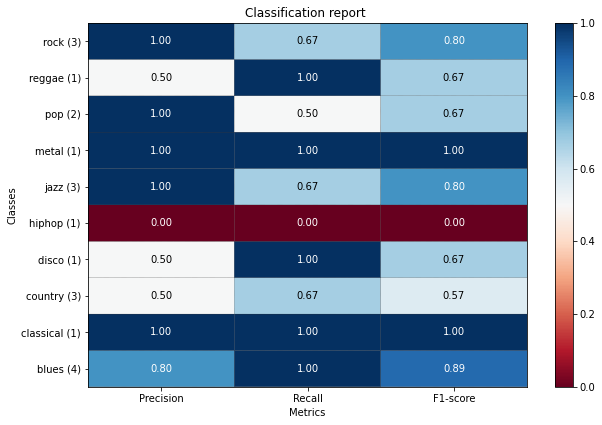

In [6]:
search_fit_predict_print(randomized_search_cv_rf_fit_predict, X30_train, y30_train, X30_test, y30_test)

# 2. K-Means

In [7]:
from k_means import *

X_train_1, y_train_1 = load_preprocess_xy('data/train.csv',0, True, True, False)
X_test_1, y_test_1 = load_preprocess_xy('data/test.csv',0, True, True, False)

### 2.1. Find number clusters by the elbow method

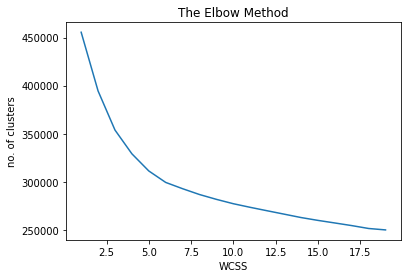

In [8]:
elbow(X_train_1)

### 2.2. Running KMeans with 10 clusters

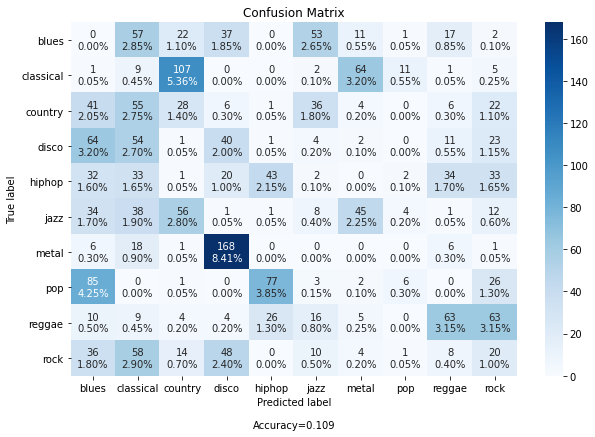

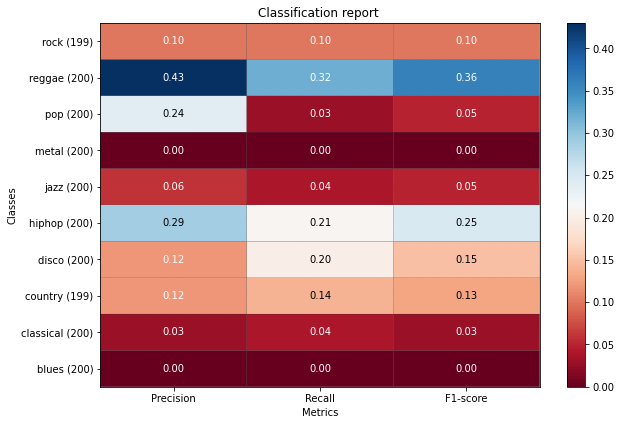

In [9]:
fit_predict_print_unsupervised(kmeans_fit_predict, X_train_1, X_test_1, y_test_1)

# 3. Neural Network

In [10]:
from ann import *

### 3.1. Load data, scale X, encode and dummify y for KFold

In [11]:
X, y = load_preprocess_xy('data/features_3_sec.csv',0, True, True, True)

### 3.2.  Trying out KFold on ANN

Epoch 1/100
800/800 [==============================] - 0s 553us/step - loss: 1.2454 - accuracy: 0.5702
Epoch 2/100
800/800 [==============================] - 0s 554us/step - loss: 0.8049 - accuracy: 0.7195
Epoch 3/100
800/800 [==============================] - 0s 546us/step - loss: 0.6613 - accuracy: 0.7764
Epoch 4/100
800/800 [==============================] - 0s 558us/step - loss: 0.5699 - accuracy: 0.8047
Epoch 5/100
800/800 [==============================] - 0s 573us/step - loss: 0.5060 - accuracy: 0.8283
Epoch 6/100
800/800 [==============================] - 0s 517us/step - loss: 0.4526 - accuracy: 0.8473
Epoch 7/100
800/800 [==============================] - 0s 537us/step - loss: 0.4122 - accuracy: 0.8580
Epoch 8/100
800/800 [==============================] - 0s 557us/step - loss: 0.3719 - accuracy: 0.8719
Epoch 9/100
800/800 [==============================] - 0s 559us/step - loss: 0.3409 - accuracy: 0.8826
Epoch 10/100
800/800 [==============================] - 0s 546us/step - l

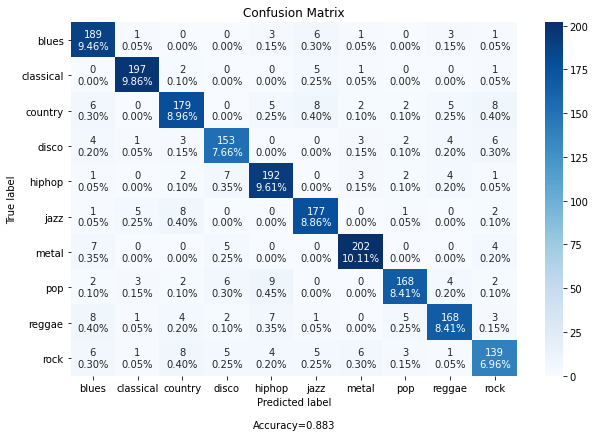

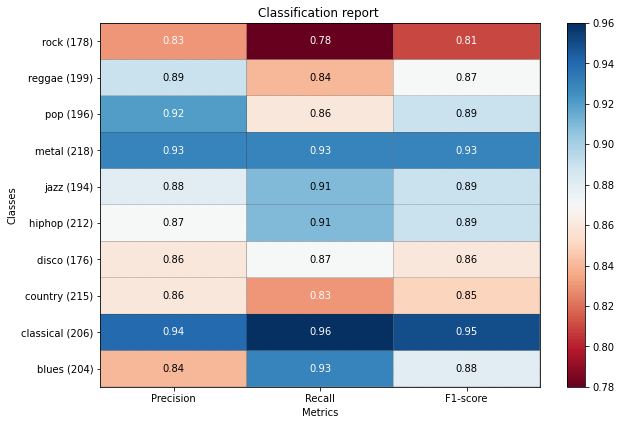

Epoch 1/100
800/800 [==============================] - 1s 954us/step - loss: 1.2298 - accuracy: 0.5744
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.7858 - accuracy: 0.7309
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6500 - accuracy: 0.7755
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5620 - accuracy: 0.8044: 0s - loss: 0.5628 - accura
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4937 - accuracy: 0.8302
Epoch 6/100
800/800 [==============================] - 1s 944us/step - loss: 0.4357 - accuracy: 0.8487
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3938 - accuracy: 0.8637
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3578 - accuracy: 0.8778
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3226 - accuracy: 0.8904
Epoch 10/100
800/800 [==============================] - 1s 

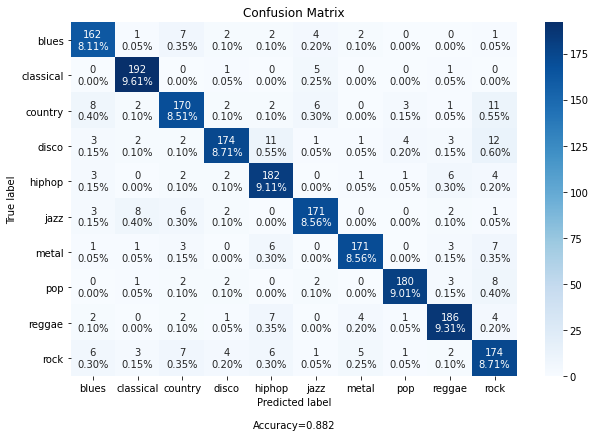

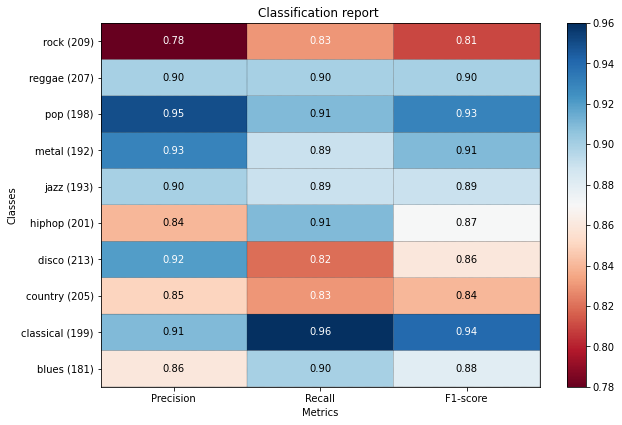

Epoch 1/100
800/800 [==============================] - 1s 766us/step - loss: 1.2198 - accuracy: 0.5727
Epoch 2/100
800/800 [==============================] - 1s 911us/step - loss: 0.7821 - accuracy: 0.7319
Epoch 3/100
800/800 [==============================] - 1s 920us/step - loss: 0.6425 - accuracy: 0.7810
Epoch 4/100
800/800 [==============================] - 1s 940us/step - loss: 0.5538 - accuracy: 0.8131
Epoch 5/100
800/800 [==============================] - 1s 934us/step - loss: 0.4866 - accuracy: 0.8362
Epoch 6/100
800/800 [==============================] - 1s 937us/step - loss: 0.4329 - accuracy: 0.8532
Epoch 7/100
800/800 [==============================] - 1s 954us/step - loss: 0.3874 - accuracy: 0.8689
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3537 - accuracy: 0.8814
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3208 - accuracy: 0.8955
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0

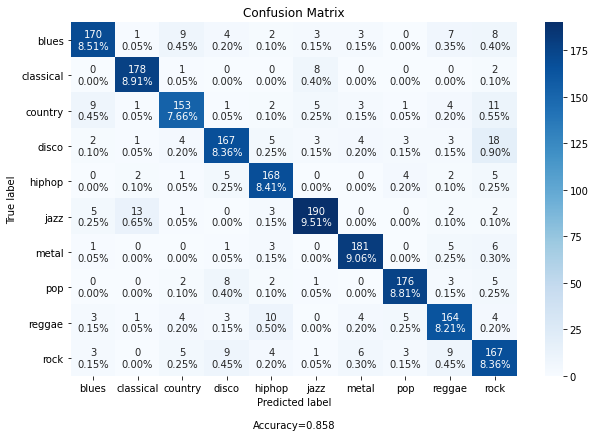

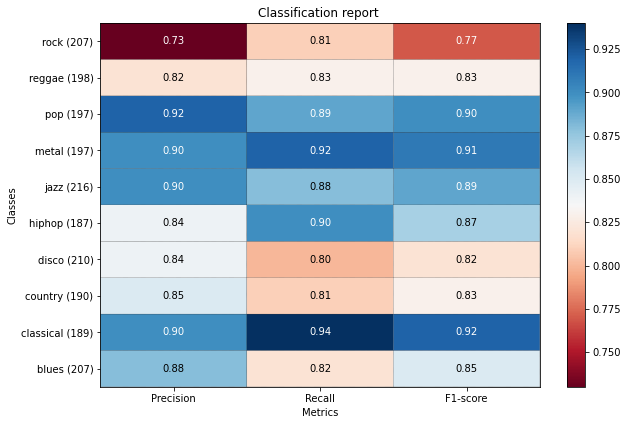

Epoch 1/100
800/800 [==============================] - 1s 735us/step - loss: 1.2537 - accuracy: 0.5584
Epoch 2/100
800/800 [==============================] - 1s 894us/step - loss: 0.8039 - accuracy: 0.7235
Epoch 3/100
800/800 [==============================] - 1s 929us/step - loss: 0.6551 - accuracy: 0.7720
Epoch 4/100
800/800 [==============================] - 1s 937us/step - loss: 0.5650 - accuracy: 0.8066
Epoch 5/100
800/800 [==============================] - 1s 920us/step - loss: 0.4948 - accuracy: 0.8292
Epoch 6/100
800/800 [==============================] - 1s 919us/step - loss: 0.4421 - accuracy: 0.8477
Epoch 7/100
800/800 [==============================] - 1s 914us/step - loss: 0.3983 - accuracy: 0.8642
Epoch 8/100
800/800 [==============================] - 1s 912us/step - loss: 0.3590 - accuracy: 0.8798
Epoch 9/100
800/800 [==============================] - 1s 951us/step - loss: 0.3272 - accuracy: 0.8896
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - los

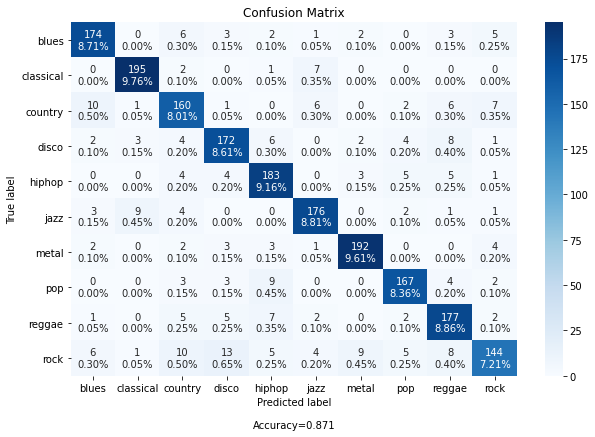

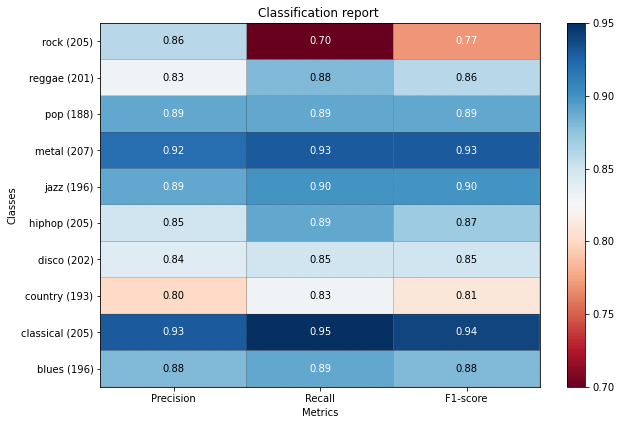

Epoch 1/100
800/800 [==============================] - 1s 736us/step - loss: 1.2333 - accuracy: 0.5717
Epoch 2/100
800/800 [==============================] - 1s 882us/step - loss: 0.7925 - accuracy: 0.7291
Epoch 3/100
800/800 [==============================] - 1s 915us/step - loss: 0.6561 - accuracy: 0.7757
Epoch 4/100
800/800 [==============================] - 1s 905us/step - loss: 0.5655 - accuracy: 0.8098
Epoch 5/100
800/800 [==============================] - 1s 920us/step - loss: 0.5016 - accuracy: 0.8303
Epoch 6/100
800/800 [==============================] - 1s 929us/step - loss: 0.4528 - accuracy: 0.8452
Epoch 7/100
800/800 [==============================] - 1s 918us/step - loss: 0.4060 - accuracy: 0.8624
Epoch 8/100
800/800 [==============================] - 1s 916us/step - loss: 0.3668 - accuracy: 0.8783
Epoch 9/100
800/800 [==============================] - 1s 938us/step - loss: 0.3330 - accuracy: 0.8876
Epoch 10/100
800/800 [==============================] - 1s 925us/step - l

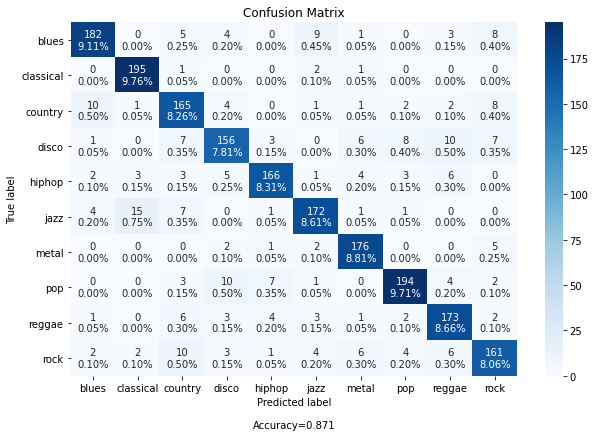

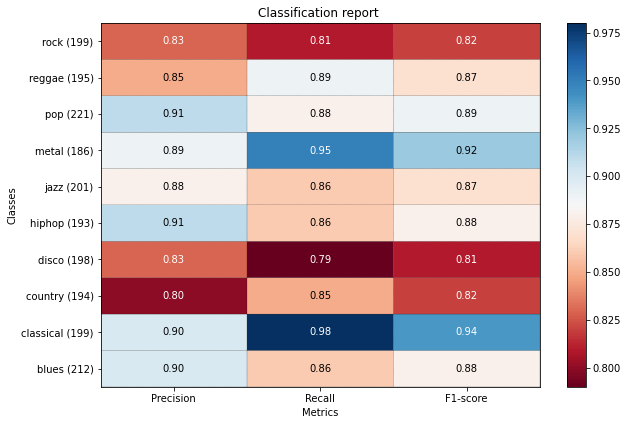

In [12]:
kf=KFold(n_splits=5, shuffle=True, random_state=True)

for train_index,test_index in kf.split(X):
  X_train_kf,X_test_kf,y_train_kf,y_test_kf=X[train_index],X[test_index],y[train_index],y[test_index]
  fit_predict_print(nn_fit_predict,X_train_kf,y_train_kf,X_test_kf,y_test_kf)

### 3.3. Running NN

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 1.2179 - accuracy: 0.5766
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.7875 - accuracy: 0.7284
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6484 - accuracy: 0.7755
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5618 - accuracy: 0.8042
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4948 - accuracy: 0.8276
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.8496
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3982 - accuracy: 0.8631
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3622 - accuracy: 0.8753
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3276 - accuracy: 0.8875
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.2957 - accura

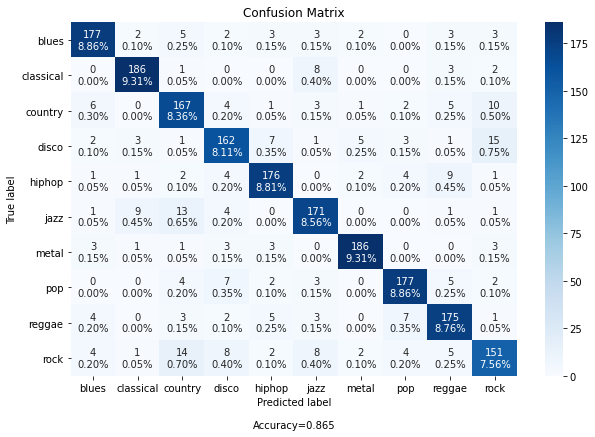

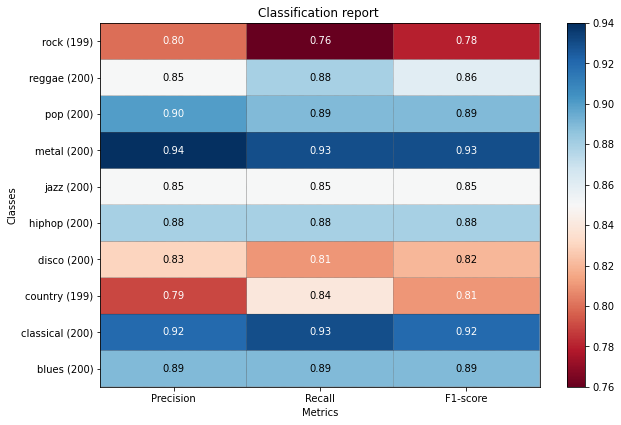

In [13]:
#Load data, scale X, encode and dummify y 
X_train_2, y_train_2 = load_preprocess_xy('data/train.csv',0, True, True, True)
X_test_2, y_test_2 = load_preprocess_xy('data/test.csv',0, True, True, True)

#Run NN
fit_predict_print(nn_fit_predict,X_train_2,y_train_2,X_test_2,y_test_2)

# 4. SVM

In [14]:
from svm import *

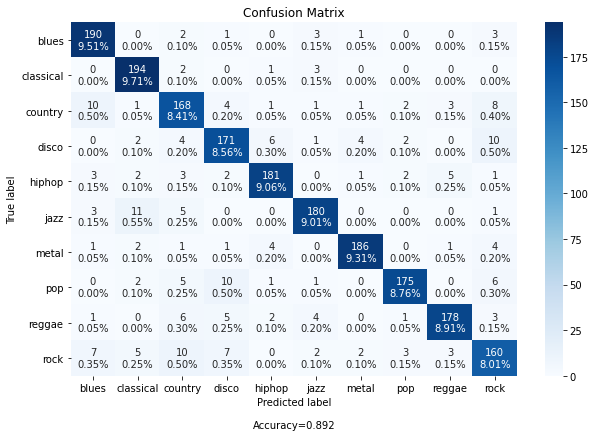

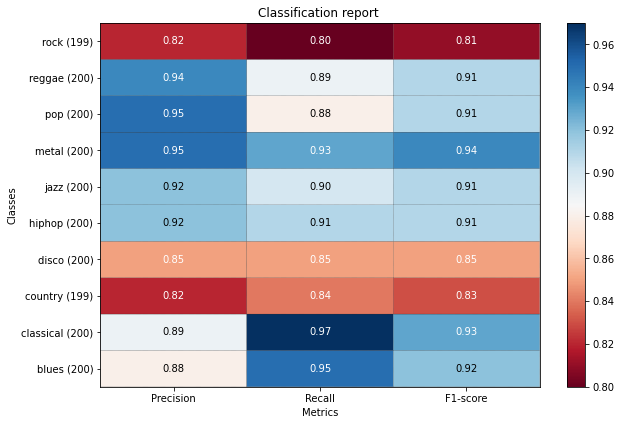

In [15]:
fit_predict_print(svm_fit_predict, X_train, y_train, X_test, y_test)

**References**

1. Data source: https://www.kaggle.com/imchentouf/gtzan-music-genre-classification/data
2. Confusion matrix source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea